In [ ]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
from scipy import stats
from google.colab import drive
import pandas as pd
import arviz as az

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vancouver_df  = pd.read_csv('/content/drive/MyDrive/STA365_data/Vancouver.csv')
toronto_df = pd.read_csv('/content/drive/MyDrive/STA365_data/Toronto.csv')

DATA:

TORONTO DATA : LESTER B PEARSON INTERNATIONAL, CA STATION
VANCOUVER DATA : VANCOUVER INTERNATIONAL STATION

TEMP - Mean temperature (.1 Fahrenheit)

DEWP - Mean dew point (.1 Fahrenheit)

SLP - Mean sea level pressure (.1 mb)

STP - Mean station pressure (.1 mb)

VISIB - Mean visibility (.1 miles)

WDSP – Mean wind speed (.1 knots)

MXSPD - Maximum sustained wind speed (.1 knots)

GUST - Maximum wind gust (.1 knots)

MAX - Maximum temperature (.1 Fahrenheit)

MIN - Minimum temperature (.1 Fahrenheit)

PRCP - Precipitation amount (.01 inches)

SNDP - Snow depth (.1 inches)

FRSHTT – Indicator for occurrence of:  000000

Fog (1st digit)

Rain or Drizzle (2nd digit)

Snow or Ice Pellets (3rd digit)

Hail (4th digit)

Thunder (5th digit)

Tornado/Funnel Cloud (6th digit)

In [ ]:
vancouver_df.head()

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,71892099999,2000-01-01,38.3,10000,999.9,42.8,38.1,18.1,0.61,1007.6,999.9,7.4,40.3,14.3,7.7
1,71892099999,2000-01-02,33.5,11000,27.0,43.2,33.6,22.9,0.09,1010.9,999.9,9.9,38.8,19.5,12.8
2,71892099999,2000-01-03,31.6,11000,27.0,40.6,32.9,15.0,0.25,1023.9,999.9,23.4,35.3,14.9,9.3
3,71892099999,2000-01-04,39.4,11000,28.9,48.2,34.9,19.0,0.91,1012.8,999.9,12.4,44.0,15.7,12.2
4,71892099999,2000-01-05,36.5,0,28.9,49.8,35.2,21.0,0.43,1026.7,999.9,25.4,42.5,29.4,11.9


In [ ]:
vancouver_df.tail()

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
8477,71892099999,2024-03-19,44.7,0,999.9,54.0,37.6,13.0,0.00,1018.0,999.9,17.4,46.6,24.2,6.9
8478,71892099999,2024-03-20,44.5,10000,17.1,53.6,39.0,15.0,0.05,1014.9,999.9,14.4,47.4,19.7,7.6
8479,71892099999,2024-03-21,42.1,0,999.9,53.2,40.5,8.9,0.00,1016.8,999.9,16.3,48.2,19.7,4.5
8480,71892099999,2024-03-22,44.9,10000,999.9,55.9,44.1,12.0,0.08,1015.5,999.9,15.0,48.9,16.5,5.3
8481,71892099999,2024-03-23,9999.9,10000,999.9,51.4,45.5,13.0,0.15,1004.5,999.9,4.0,48.0,13.8,6.9


In [ ]:
toronto_df.head()

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,71624099999,2000-01-01,26.7,0,999.9,46.4,16.0,15.0,0.03,1018.2,999.9,996.7,36.0,11.7,7.1
1,71624099999,2000-01-02,32.3,10000,21.0,46.9,28.0,8.0,0.04,1013.9,999.9,993.3,36.6,7.0,3.3
2,71624099999,2000-01-03,32.9,11000,28.0,54.0,28.0,22.0,0.06,1014.0,999.9,992.3,39.1,13.5,12.9
3,71624099999,2000-01-04,32.0,111000,42.0,50.7,28.4,29.9,0.15,1002.8,999.9,982.2,36.8,8.4,13.9
4,71624099999,2000-01-05,12.5,1000,42.0,28.9,17.6,21.0,0.00,1020.2,999.9,997.3,22.8,15.0,10.2


In [ ]:
toronto_df.tail()

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
8476,71624099999,2024-03-19,23.4,1000,27.0,37.4,27.0,19.0,0.02,1007.0,999.9,985.5,30.8,11.1,13.7
8477,71624099999,2024-03-20,22.4,1000,38.1,33.8,26.6,31.1,0.09,1003.7,0.4,982.4,31.2,12.6,14.9
8478,71624099999,2024-03-21,9.3,0,26.0,34.7,18.5,20.0,0.02,1021.2,0.4,999.3,24.1,15.0,14.5
8479,71624099999,2024-03-22,14.1,1000,17.1,30.2,16.9,11.1,0.06,1027.6,0.4,5.4,22.5,9.7,6.1
8480,71624099999,2024-03-23,18.1,1000,21.0,35.6,19.2,18.1,0.30,1021.3,4.3,999.3,25.2,11.3,11.1


In [ ]:
toronto_after_2020 = toronto_df[toronto_df["DATE"] > "2019-12-31"]
toronto_after_2020

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
6938,71624099999,2020-01-01,22.8,1000,27.0,32.0,26.6,15.0,0.00,1004.6,0.4,983.2,29.7,14.8,9.1
6939,71624099999,2020-01-02,27.4,0,25.1,43.2,26.2,15.9,0.00,1005.7,0.4,984.5,36.3,15.0,12.3
6940,71624099999,2020-01-03,35.6,0,18.1,44.6,40.3,13.0,0.00,1006.2,999.9,985.2,42.3,14.7,8.9
6941,71624099999,2020-01-04,29.4,11000,17.1,44.2,31.8,13.0,0.06,1008.7,0.4,987.4,35.1,12.4,8.5
6942,71624099999,2020-01-05,23.1,11000,24.1,33.8,26.6,17.1,0.00,1013.4,0.4,991.9,31.5,14.1,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,71624099999,2024-03-19,23.4,1000,27.0,37.4,27.0,19.0,0.02,1007.0,999.9,985.5,30.8,11.1,13.7
8477,71624099999,2024-03-20,22.4,1000,38.1,33.8,26.6,31.1,0.09,1003.7,0.4,982.4,31.2,12.6,14.9
8478,71624099999,2024-03-21,9.3,0,26.0,34.7,18.5,20.0,0.02,1021.2,0.4,999.3,24.1,15.0,14.5
8479,71624099999,2024-03-22,14.1,1000,17.1,30.2,16.9,11.1,0.06,1027.6,0.4,5.4,22.5,9.7,6.1


In [ ]:
vancouver_after_2020 = vancouver_df[vancouver_df["DATE"] > "2019-12-31"]
vancouver_after_2020

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
6940,71892099999,2020-01-01,44.5,10000,24.1,51.8,42.8,14.0,0.26,1002.2,999.9,1.6,48.0,17.9,7.1
6941,71892099999,2020-01-02,35.6,10000,36.9,50.0,37.4,28.0,0.00,1015.9,999.9,15.3,42.0,16.3,12.4
6942,71892099999,2020-01-03,41.1,10000,29.9,52.0,36.9,22.0,0.83,1010.9,999.9,10.3,44.9,11.6,13.9
6943,71892099999,2020-01-04,38.1,10000,25.1,53.6,39.7,19.0,0.13,1011.9,999.9,11.3,45.7,18.7,12.9
6944,71892099999,2020-01-05,39.0,10000,38.1,47.1,40.8,31.1,0.14,1021.5,999.9,21.0,43.9,15.6,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,71892099999,2024-03-19,44.7,0,999.9,54.0,37.6,13.0,0.00,1018.0,999.9,17.4,46.6,24.2,6.9
8478,71892099999,2024-03-20,44.5,10000,17.1,53.6,39.0,15.0,0.05,1014.9,999.9,14.4,47.4,19.7,7.6
8479,71892099999,2024-03-21,42.1,0,999.9,53.2,40.5,8.9,0.00,1016.8,999.9,16.3,48.2,19.7,4.5
8480,71892099999,2024-03-22,44.9,10000,999.9,55.9,44.1,12.0,0.08,1015.5,999.9,15.0,48.9,16.5,5.3


In [ ]:
toronto_after_2020.dtypes

STATION      int64
DATE        object
DEWP       float64
FRSHTT       int64
GUST       float64
MAX        float64
MIN        float64
MXSPD      float64
PRCP       float64
SLP        float64
SNDP       float64
STP        float64
TEMP       float64
VISIB      float64
WDSP       float64
dtype: object

In [ ]:
vancouver_after_2020.dtypes

STATION      int64
DATE        object
DEWP       float64
FRSHTT       int64
GUST       float64
MAX        float64
MIN        float64
MXSPD      float64
PRCP       float64
SLP        float64
SNDP       float64
STP        float64
TEMP       float64
VISIB      float64
WDSP       float64
dtype: object

In [ ]:
toronto_after_2020.describe()

,STATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,1.543000e+03,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,7.162410e+10,38.459041,7509.656513,224.883603,58.496760,40.501102,15.844070,0.084634,1016.137071,772.912897,748.882178,48.991640,13.620350,8.596111
std,0.000000e+00,17.255927,18115.406216,395.045633,19.790347,17.245470,5.375514,0.206344,7.436182,418.435114,425.843578,18.318019,2.405576,3.249671
min,7.162410e+10,-15.800000,0.000000,15.000000,7.500000,-7.600000,5.100000,0.000000,984.500000,0.400000,0.000000,0.800000,1.400000,2.600000
25%,7.162410e+10,25.700000,0.000000,20.000000,41.000000,27.500000,12.000000,0.000000,1011.350000,999.900000,973.550000,34.050000,13.300000,6.100000
50%,7.162410e+10,36.700000,1000.000000,25.100000,57.900000,38.700000,15.000000,0.000000,1016.000000,999.900000,990.900000,47.400000,14.800000,8.100000
75%,7.162410e+10,53.400000,10000.000000,35.450000,77.000000,55.800000,19.000000,0.060000,1020.900000,999.900000,995.100000,66.100000,15.000000,10.400000
max,7.162410e+10,73.900000,111010.000000,999.900000,95.900000,75.200000,41.000000,2.100000,1041.500000,999.900000,999.900000,84.200000,16.800000,25.600000


In [ ]:
vancouver_after_2020.describe()

,STATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,1.542000e+03,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000
mean,7.189210e+10,77.267315,8129.319066,493.511219,57.914462,43.933009,13.400130,0.310597,1016.933787,972.729961,39.065499,50.706161,17.950130,7.366213
std,0.000000e+00,566.226800,17219.217088,489.131713,12.138084,10.582901,4.748521,4.409524,7.166933,162.425265,146.022148,10.996091,4.579897,2.828988
min,7.189210e+10,-1.300000,0.000000,15.000000,19.400000,4.500000,5.100000,0.000000,984.100000,0.400000,0.000000,12.900000,1.100000,1.800000
25%,7.189210e+10,38.100000,0.000000,20.000000,48.200000,35.600000,9.900000,0.000000,1013.000000,999.900000,12.800000,42.500000,15.500000,5.300000
50%,7.189210e+10,44.800000,10000.000000,34.000000,55.400000,43.700000,12.000000,0.000000,1017.100000,999.900000,16.900000,49.550000,18.400000,6.900000
75%,7.189210e+10,53.500000,10000.000000,999.900000,68.000000,53.100000,15.900000,0.120000,1021.200000,999.900000,21.100000,59.875000,21.000000,8.800000
max,7.189210e+10,9999.900000,111000.000000,999.900000,90.100000,68.000000,40.000000,99.990000,1039.000000,999.900000,999.700000,79.400000,27.900000,20.100000


According to documentation,

All 9's in a field (e.g., 99.99 for PRCP) indicates no report or insufficient data.

We can observe that DEWP, GUST, PRCP, SNDP contains missing data.

In [ ]:
len(toronto_after_2020[toronto_after_2020["GUST"] == 999.9])

318

In [ ]:
len(toronto_after_2020[toronto_after_2020["SNDP"] == 999.9])

1192

In [ ]:
len(vancouver_after_2020[vancouver_after_2020["DEWP"] == 9999.9])

5

In [ ]:
len(vancouver_after_2020[vancouver_after_2020["GUST"] == 999.9])

744

In [ ]:
len(vancouver_after_2020[vancouver_after_2020["PRCP"] == 99.99])

3

In [ ]:
len(vancouver_after_2020[vancouver_after_2020["SNDP"] == 999.9])

1500

While we can perform a Complete Case Analysis to handle the missing data for Vancouver's PRCP and DEWP as the missing data proportion is very low (i.e., < 3\%), it seems to be sensible to drop the column "GUST" as it contains way too many missing data.




For SNDP (snow depth), we will need to examine more as we are skeptical that the missingness may indicate 0 in most of the time.

In [ ]:
len(toronto_after_2020[toronto_after_2020["SNDP"] == 0])

0

We can confirm that there is no record for 0 SNDP. For this analysis, we will make the following assumption.

If the SNDP value was 999.9 for any of the previous day or next day, we will convert it to 0 (as there is a high chance that it would just indicate 0 snow amount).

If the SNDP values for the previous day and next day are present, we will convert it to the average of those two values (as it is sensible to think that snow wouldn't just simply disappear).

With this in mind, we will modify the SNDP columns.


In [ ]:
def impute_SNDP(df):
  indices = np.where(df["SNDP"] == 999.9)[0].tolist()
  for index in indices:
    if index != 0 and index != len(df) - 1:
      if df.iloc[index - 1]["SNDP"] != 999.9 and df.iloc[index + 1]["SNDP"] != 999.9:
        df.loc[index, "SNDP"] = np.mean([df.iloc[index - 1]["SNDP"], df.iloc[index + 1]["SNDP"]])
      else:
        df.loc[index, "SNDP"] = 0
    else:
      if index == 0:
        if df.iloc[index + 1]["SNDP"] != 999.9:
          df.loc[index, "SNDP"] = df.iloc[index + 1]["SNDP"]
        else:
          df.loc[index, "SNDP"] = 0
      else:
        if index == len(df) - 1:
          if df.iloc[index - 1]["SNDP"] != 0:
            df.loc[index, "SNDP"] = df.iloc[index - 1]["SNDP"]
          else:
            df.loc[index, "SNDP"] = 0

In [ ]:
vancouver_after_2020 = vancouver_after_2020.reset_index(drop=True)
toronto_after_2020 = toronto_after_2020.reset_index(drop=True)

In [ ]:
impute_SNDP(vancouver_after_2020)
impute_SNDP(toronto_after_2020)

In [ ]:
vancouver_after_2020

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,71892099999,2020-01-01,44.5,10000,24.1,51.8,42.8,14.0,0.26,1002.2,0.0,1.6,48.0,17.9,7.1
1,71892099999,2020-01-02,35.6,10000,36.9,50.0,37.4,28.0,0.00,1015.9,0.0,15.3,42.0,16.3,12.4
2,71892099999,2020-01-03,41.1,10000,29.9,52.0,36.9,22.0,0.83,1010.9,0.0,10.3,44.9,11.6,13.9
3,71892099999,2020-01-04,38.1,10000,25.1,53.6,39.7,19.0,0.13,1011.9,0.0,11.3,45.7,18.7,12.9
4,71892099999,2020-01-05,39.0,10000,38.1,47.1,40.8,31.1,0.14,1021.5,0.0,21.0,43.9,15.6,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,71892099999,2024-03-19,44.7,0,999.9,54.0,37.6,13.0,0.00,1018.0,0.0,17.4,46.6,24.2,6.9
1538,71892099999,2024-03-20,44.5,10000,17.1,53.6,39.0,15.0,0.05,1014.9,0.0,14.4,47.4,19.7,7.6
1539,71892099999,2024-03-21,42.1,0,999.9,53.2,40.5,8.9,0.00,1016.8,0.0,16.3,48.2,19.7,4.5
1540,71892099999,2024-03-22,44.9,10000,999.9,55.9,44.1,12.0,0.08,1015.5,0.0,15.0,48.9,16.5,5.3


In [ ]:
vancouver_after_2020.describe()

,STATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,1.542000e+03,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000
mean,7.189210e+10,77.267315,8129.319066,493.511219,57.914462,43.933009,13.400130,0.310597,1016.933787,0.075778,39.065499,50.706161,17.950130,7.366213
std,0.000000e+00,566.226800,17219.217088,489.131713,12.138084,10.582901,4.748521,4.409524,7.166933,0.593559,146.022148,10.996091,4.579897,2.828988
min,7.189210e+10,-1.300000,0.000000,15.000000,19.400000,4.500000,5.100000,0.000000,984.100000,0.000000,0.000000,12.900000,1.100000,1.800000
25%,7.189210e+10,38.100000,0.000000,20.000000,48.200000,35.600000,9.900000,0.000000,1013.000000,0.000000,12.800000,42.500000,15.500000,5.300000
50%,7.189210e+10,44.800000,10000.000000,34.000000,55.400000,43.700000,12.000000,0.000000,1017.100000,0.000000,16.900000,49.550000,18.400000,6.900000
75%,7.189210e+10,53.500000,10000.000000,999.900000,68.000000,53.100000,15.900000,0.120000,1021.200000,0.000000,21.100000,59.875000,21.000000,8.800000
max,7.189210e+10,9999.900000,111000.000000,999.900000,90.100000,68.000000,40.000000,99.990000,1039.000000,8.300000,999.700000,79.400000,27.900000,20.100000


In [ ]:
toronto_after_2020.describe()

,STATION,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,1.543000e+03,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,7.162410e+10,38.459041,7509.656513,224.883603,58.496760,40.501102,15.844070,0.084634,1016.137071,0.509430,748.882178,48.991640,13.620350,8.596111
std,0.000000e+00,17.255927,18115.406216,395.045633,19.790347,17.245470,5.375514,0.206344,7.436182,1.448906,425.843578,18.318019,2.405576,3.249671
min,7.162410e+10,-15.800000,0.000000,15.000000,7.500000,-7.600000,5.100000,0.000000,984.500000,0.000000,0.000000,0.800000,1.400000,2.600000
25%,7.162410e+10,25.700000,0.000000,20.000000,41.000000,27.500000,12.000000,0.000000,1011.350000,0.000000,973.550000,34.050000,13.300000,6.100000
50%,7.162410e+10,36.700000,1000.000000,25.100000,57.900000,38.700000,15.000000,0.000000,1016.000000,0.000000,990.900000,47.400000,14.800000,8.100000
75%,7.162410e+10,53.400000,10000.000000,35.450000,77.000000,55.800000,19.000000,0.060000,1020.900000,0.400000,995.100000,66.100000,15.000000,10.400000
max,7.162410e+10,73.900000,111010.000000,999.900000,95.900000,75.200000,41.000000,2.100000,1041.500000,12.600000,999.900000,84.200000,16.800000,25.600000


We will make FRSHTT categorical as well.

To make our analysis more clear, we will simplify FRSHTT such that joint conditions are removed.

In [ ]:
# observe unique values of FRSHTT

vancouver_after_2020.FRSHTT.unique()

array([ 10000,      0,  11000,   1000,  10010, 110000, 100000,  10100,
       111000,  11010,     10])

In [ ]:
toronto_after_2020.FRSHTT.unique()

array([  1000,      0,  11000,  10000, 110000,  10010, 110010,     10,
       100000,  11100, 111000,  11110,  11010, 101000, 111010])

We will assume the following priority orders:

Tornado > Thunder > Hail > Snow > Rain > Fog > Sunny

That is, if a particular day we had rain, snow and hail, we will consider this weather as hail.

We will denote Tornado as 6, Thunder as 5, Hail as 4, Snow as 3, Rain as 2, and Fog as 1 and finally Sunny as 0.

In [ ]:
def weather_conversion(df):
  # lazy way of computing
  tornado_indices = df.index[df["FRSHTT"] % 10 != 0].tolist()
  thunder_indices = df.index[df["FRSHTT"] % 100 != 0].tolist()
  hail_indices = df.index[df["FRSHTT"] % 1000 != 0].tolist()
  snow_indices = df.index[df["FRSHTT"] % 10000 != 0].tolist()
  rain_indices = df.index[df["FRSHTT"] % 100000 != 0].tolist()
  fog_indices = df.index[df["FRSHTT"] % 1000000 != 0].tolist()
  df.loc[:, "FRSHTT"] = 0
  df.loc[fog_indices, "FRSHTT"] = 1
  df.loc[rain_indices, "FRSHTT"] = 2
  df.loc[snow_indices, "FRSHTT"] = 3
  df.loc[hail_indices, "FRSHTT"] = 4
  df.loc[thunder_indices, "FRSHTT"] = 5
  df.loc[tornado_indices, "FRSHTT"] = 6

In [ ]:
# run and check if our function is working accordingly

toronto_after_2020

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,71624099999,2020-01-01,22.8,1000,27.0,32.0,26.6,15.0,0.00,1004.6,0.4,983.2,29.7,14.8,9.1
1,71624099999,2020-01-02,27.4,0,25.1,43.2,26.2,15.9,0.00,1005.7,0.4,984.5,36.3,15.0,12.3
2,71624099999,2020-01-03,35.6,0,18.1,44.6,40.3,13.0,0.00,1006.2,0.4,985.2,42.3,14.7,8.9
3,71624099999,2020-01-04,29.4,11000,17.1,44.2,31.8,13.0,0.06,1008.7,0.4,987.4,35.1,12.4,8.5
4,71624099999,2020-01-05,23.1,11000,24.1,33.8,26.6,17.1,0.00,1013.4,0.4,991.9,31.5,14.1,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,71624099999,2024-03-19,23.4,1000,27.0,37.4,27.0,19.0,0.02,1007.0,0.2,985.5,30.8,11.1,13.7
1539,71624099999,2024-03-20,22.4,1000,38.1,33.8,26.6,31.1,0.09,1003.7,0.4,982.4,31.2,12.6,14.9
1540,71624099999,2024-03-21,9.3,0,26.0,34.7,18.5,20.0,0.02,1021.2,0.4,999.3,24.1,15.0,14.5
1541,71624099999,2024-03-22,14.1,1000,17.1,30.2,16.9,11.1,0.06,1027.6,0.4,5.4,22.5,9.7,6.1


We will also convert the stations such that 1 represents Toronto and 2 represents Vancouver and make them categorical variable.

In [ ]:
vancouver_after_2020

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,71892099999,2020-01-01,44.5,10000,24.1,51.8,42.8,14.0,0.26,1002.2,0.0,1.6,48.0,17.9,7.1
1,71892099999,2020-01-02,35.6,10000,36.9,50.0,37.4,28.0,0.00,1015.9,0.0,15.3,42.0,16.3,12.4
2,71892099999,2020-01-03,41.1,10000,29.9,52.0,36.9,22.0,0.83,1010.9,0.0,10.3,44.9,11.6,13.9
3,71892099999,2020-01-04,38.1,10000,25.1,53.6,39.7,19.0,0.13,1011.9,0.0,11.3,45.7,18.7,12.9
4,71892099999,2020-01-05,39.0,10000,38.1,47.1,40.8,31.1,0.14,1021.5,0.0,21.0,43.9,15.6,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,71892099999,2024-03-19,44.7,0,999.9,54.0,37.6,13.0,0.00,1018.0,0.0,17.4,46.6,24.2,6.9
1538,71892099999,2024-03-20,44.5,10000,17.1,53.6,39.0,15.0,0.05,1014.9,0.0,14.4,47.4,19.7,7.6
1539,71892099999,2024-03-21,42.1,0,999.9,53.2,40.5,8.9,0.00,1016.8,0.0,16.3,48.2,19.7,4.5
1540,71892099999,2024-03-22,44.9,10000,999.9,55.9,44.1,12.0,0.08,1015.5,0.0,15.0,48.9,16.5,5.3


In [ ]:
weather_conversion(vancouver_after_2020)
weather_conversion(toronto_after_2020)
toronto_after_2020

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,71624099999,2020-01-01,22.8,3,27.0,32.0,26.6,15.0,0.00,1004.6,0.4,983.2,29.7,14.8,9.1
1,71624099999,2020-01-02,27.4,0,25.1,43.2,26.2,15.9,0.00,1005.7,0.4,984.5,36.3,15.0,12.3
2,71624099999,2020-01-03,35.6,0,18.1,44.6,40.3,13.0,0.00,1006.2,0.4,985.2,42.3,14.7,8.9
3,71624099999,2020-01-04,29.4,3,17.1,44.2,31.8,13.0,0.06,1008.7,0.4,987.4,35.1,12.4,8.5
4,71624099999,2020-01-05,23.1,3,24.1,33.8,26.6,17.1,0.00,1013.4,0.4,991.9,31.5,14.1,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,71624099999,2024-03-19,23.4,3,27.0,37.4,27.0,19.0,0.02,1007.0,0.2,985.5,30.8,11.1,13.7
1539,71624099999,2024-03-20,22.4,3,38.1,33.8,26.6,31.1,0.09,1003.7,0.4,982.4,31.2,12.6,14.9
1540,71624099999,2024-03-21,9.3,0,26.0,34.7,18.5,20.0,0.02,1021.2,0.4,999.3,24.1,15.0,14.5
1541,71624099999,2024-03-22,14.1,3,17.1,30.2,16.9,11.1,0.06,1027.6,0.4,5.4,22.5,9.7,6.1


In [ ]:
vancouver_after_2020

,STATION,DATE,DEWP,FRSHTT,GUST,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,71892099999,2020-01-01,44.5,2,24.1,51.8,42.8,14.0,0.26,1002.2,0.0,1.6,48.0,17.9,7.1
1,71892099999,2020-01-02,35.6,2,36.9,50.0,37.4,28.0,0.00,1015.9,0.0,15.3,42.0,16.3,12.4
2,71892099999,2020-01-03,41.1,2,29.9,52.0,36.9,22.0,0.83,1010.9,0.0,10.3,44.9,11.6,13.9
3,71892099999,2020-01-04,38.1,2,25.1,53.6,39.7,19.0,0.13,1011.9,0.0,11.3,45.7,18.7,12.9
4,71892099999,2020-01-05,39.0,2,38.1,47.1,40.8,31.1,0.14,1021.5,0.0,21.0,43.9,15.6,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,71892099999,2024-03-19,44.7,0,999.9,54.0,37.6,13.0,0.00,1018.0,0.0,17.4,46.6,24.2,6.9
1538,71892099999,2024-03-20,44.5,2,17.1,53.6,39.0,15.0,0.05,1014.9,0.0,14.4,47.4,19.7,7.6
1539,71892099999,2024-03-21,42.1,0,999.9,53.2,40.5,8.9,0.00,1016.8,0.0,16.3,48.2,19.7,4.5
1540,71892099999,2024-03-22,44.9,2,999.9,55.9,44.1,12.0,0.08,1015.5,0.0,15.0,48.9,16.5,5.3


We will also convert the stations such that 1 represents Toronto and 2 represents Vancouver.

Finally, we will make STATION, FRSHTT categorical variables.

In [ ]:
toronto_final = toronto_after_2020.drop(["GUST"], axis=1)
toronto_final["STATION"] = 1
toronto_final["STATION"] = toronto_final.STATION.astype('category')
toronto_final["FRSHTT"] = toronto_final.FRSHTT.astype('category')
toronto_final

,STATION,DATE,DEWP,FRSHTT,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,1,2020-01-01,22.8,3,32.0,26.6,15.0,0.00,1004.6,0.4,983.2,29.7,14.8,9.1
1,1,2020-01-02,27.4,0,43.2,26.2,15.9,0.00,1005.7,0.4,984.5,36.3,15.0,12.3
2,1,2020-01-03,35.6,0,44.6,40.3,13.0,0.00,1006.2,0.4,985.2,42.3,14.7,8.9
3,1,2020-01-04,29.4,3,44.2,31.8,13.0,0.06,1008.7,0.4,987.4,35.1,12.4,8.5
4,1,2020-01-05,23.1,3,33.8,26.6,17.1,0.00,1013.4,0.4,991.9,31.5,14.1,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1,2024-03-19,23.4,3,37.4,27.0,19.0,0.02,1007.0,0.2,985.5,30.8,11.1,13.7
1539,1,2024-03-20,22.4,3,33.8,26.6,31.1,0.09,1003.7,0.4,982.4,31.2,12.6,14.9
1540,1,2024-03-21,9.3,0,34.7,18.5,20.0,0.02,1021.2,0.4,999.3,24.1,15.0,14.5
1541,1,2024-03-22,14.1,3,30.2,16.9,11.1,0.06,1027.6,0.4,5.4,22.5,9.7,6.1


In [ ]:
vancouver_final = vancouver_after_2020.drop(["GUST"], axis=1)
vancouver_final["STATION"] = 2
vancouver_final["STATION"] = vancouver_final.STATION.astype('category')
vancouver_final["FRSHTT"] = vancouver_final.FRSHTT.astype('category')
vancouver_final

,STATION,DATE,DEWP,FRSHTT,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
0,2,2020-01-01,44.5,2,51.8,42.8,14.0,0.26,1002.2,0.0,1.6,48.0,17.9,7.1
1,2,2020-01-02,35.6,2,50.0,37.4,28.0,0.00,1015.9,0.0,15.3,42.0,16.3,12.4
2,2,2020-01-03,41.1,2,52.0,36.9,22.0,0.83,1010.9,0.0,10.3,44.9,11.6,13.9
3,2,2020-01-04,38.1,2,53.6,39.7,19.0,0.13,1011.9,0.0,11.3,45.7,18.7,12.9
4,2,2020-01-05,39.0,2,47.1,40.8,31.1,0.14,1021.5,0.0,21.0,43.9,15.6,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,2,2024-03-19,44.7,0,54.0,37.6,13.0,0.00,1018.0,0.0,17.4,46.6,24.2,6.9
1538,2,2024-03-20,44.5,2,53.6,39.0,15.0,0.05,1014.9,0.0,14.4,47.4,19.7,7.6
1539,2,2024-03-21,42.1,0,53.2,40.5,8.9,0.00,1016.8,0.0,16.3,48.2,19.7,4.5
1540,2,2024-03-22,44.9,2,55.9,44.1,12.0,0.08,1015.5,0.0,15.0,48.9,16.5,5.3


Now we can finally drop all the missing data from PRCP and DEWP as mentioned earlier.

In [ ]:
def drop_PRCP_DEWP_missing(df):
  df.drop(df[df.PRCP == 99.99].index, inplace=True)
  df.drop(df[df.DEWP == 9999.9].index, inplace=True)


drop_PRCP_DEWP_missing(vancouver_final)
drop_PRCP_DEWP_missing(toronto_final)

In [ ]:
vancouver_final = vancouver_final.reset_index(drop=True)
toronto_final = toronto_final.reset_index(drop=True)

vancouver_final.describe()

,DEWP,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000
mean,45.009778,57.968644,43.955737,13.406128,0.115821,1016.939961,0.070763,39.189831,50.748305,17.981030,7.367797
std,10.488335,12.139100,10.584840,4.752657,0.251054,7.146724,0.563743,146.390609,10.992284,4.560569,2.831174
min,-1.300000,19.400000,4.500000,5.100000,0.000000,984.100000,0.000000,0.000000,12.900000,1.100000,1.800000
25%,38.100000,48.200000,35.600000,9.900000,0.000000,1013.000000,0.000000,12.800000,42.500000,15.600000,5.300000
50%,44.800000,55.600000,43.800000,12.000000,0.000000,1017.100000,0.000000,16.900000,49.700000,18.450000,6.900000
75%,53.475000,68.000000,53.100000,15.900000,0.120000,1021.200000,0.000000,21.100000,59.900000,21.000000,8.800000
max,68.500000,90.100000,68.000000,40.000000,3.000000,1039.000000,8.300000,999.700000,79.400000,27.900000,20.100000


In [ ]:
toronto_final.describe()

,DEWP,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,38.459041,58.496760,40.501102,15.844070,0.084634,1016.137071,0.509430,748.882178,48.991640,13.620350,8.596111
std,17.255927,19.790347,17.245470,5.375514,0.206344,7.436182,1.448906,425.843578,18.318019,2.405576,3.249671
min,-15.800000,7.500000,-7.600000,5.100000,0.000000,984.500000,0.000000,0.000000,0.800000,1.400000,2.600000
25%,25.700000,41.000000,27.500000,12.000000,0.000000,1011.350000,0.000000,973.550000,34.050000,13.300000,6.100000
50%,36.700000,57.900000,38.700000,15.000000,0.000000,1016.000000,0.000000,990.900000,47.400000,14.800000,8.100000
75%,53.400000,77.000000,55.800000,19.000000,0.060000,1020.900000,0.400000,995.100000,66.100000,15.000000,10.400000
max,73.900000,95.900000,75.200000,41.000000,2.100000,1041.500000,12.600000,999.900000,84.200000,16.800000,25.600000


In [ ]:
# now consider seven predictors with 2 years of data

toronto_2021 = toronto_final[toronto_final["DATE"] > "2020-03-23"]
toronto_2021 = toronto_2021.reset_index(drop=True)

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
toronto_2021[["DEWP", 'TEMP', 'PRCP', "SNDP", "WDSP", "VISIB", "SLP"]] = min_max_scaler.fit_transform(
        toronto_2021[["DEWP", 'TEMP', 'PRCP', "SNDP", "WDSP", "VISIB", "SLP"]])

toronto_2021.describe()

,DEWP,MAX,MIN,MXSPD,PRCP,SLP,SNDP,STP,TEMP,VISIB,WDSP
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.615004,59.666849,41.454452,15.769658,0.044495,0.585700,0.037563,756.712877,0.590290,0.796727,0.257043
std,0.191271,19.607785,17.120049,5.417058,0.106952,0.135189,0.113957,421.257237,0.218025,0.153532,0.142181
min,0.000000,7.500000,-7.600000,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474638,42.375000,28.400000,12.000000,0.000000,0.499535,0.000000,977.875000,0.410072,0.779221,0.147826
50%,0.600892,59.800000,41.000000,15.000000,0.000000,0.583643,0.000000,991.000000,0.578537,0.876623,0.234783
75%,0.781494,77.500000,56.800000,19.000000,0.031915,0.674721,0.000000,995.200000,0.792866,0.883117,0.334783
max,1.000000,95.900000,75.200000,41.000000,1.000000,1.000000,1.000000,999.900000,1.000000,1.000000,1.000000


In [ ]:
X_hum = toronto_2021[["TEMP", "DEWP", "PRCP"]].values # (n x 3)
X= toronto_2021[["SLP", "WDSP", "SNDP"]].values # (n x 3)

y = toronto_2021["FRSHTT"].values

n = y.shape[0] # number of data
k = 7 # number of classes
epsilon = 0.01
strong_epsilon = 0.0001

with pm.Model(coords={"cluster": range(k)}) as MixtureModel:
    chol = pm.LKJCholeskyCov("chol", n=k, eta=3, sd_dist=pm.HalfNormal.dist(5))
    beta_k = pm.MvNormal('beta_k', mu=np.zeros((3, k)), chol=chol[0], shape=(3, k))
    chol_hum = pm.LKJCholeskyCov("chol_hum", n=3, eta=3, sd_dist=pm.HalfNormal.dist(3))
    beta_hum = pm.MvNormal('beta_hum', mu=0, chol=chol_hum[0], shape=(3,))
    sigma_hum = pm.HalfCauchy('sigma_hum', beta=1)
    mu_hum = pm.Deterministic('mu_hum', pm.math.dot(X_hum, beta_hum))
    hum = pm.Normal('hum', mu=mu_hum, sigma=sigma_hum, shape=(n,))
    mu_temp = pm.Deterministic('mu_temp', pm.math.switch(pm.math.lt(pm.math.dot(X, beta_k) + hum[:, None], 0), 0 - epsilon, pm.math.dot(X, beta_k) + hum[:, None]))
    mu = pm.Deterministic('mu', pm.math.switch(pm.math.gt(mu_temp, k - 1), k - 1 + epsilon, mu_temp))
    alpha = pm.Gamma('alpha', alpha=2, beta=1, dims="cluster")
    v = pm.Dirichlet('v', a=alpha, dims="cluster")
    sigma_y = pm.HalfCauchy('sigma_y', beta=0.2, dims="cluster")
    y_obs = pm.NormalMixture('y_obs', w=v, mu=mu, sigma=sigma_y, observed=y)
    y_constraint = pm.Potential("y_constraint", pm.math.log(pm.math.switch((y_obs >= 0) & (y_obs <= 5), 1, strong_epsilon)))


In [ ]:
import logging
_log = logging.getLogger("pymc")
_log.setLevel(logging.INFO)


with MixtureModel:
    result = pm.sample(draws=1000, tune=1000, init='jitter+adapt_diag', cores=4, keep_warning_stat=True)

INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc.sampling.mcmc:NUTS: [chol, beta_k, chol_hum, beta_hum, sigma_hum, hum, alpha, v, sigma_y]


INFO:pymc.sampling.mcmc:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3404 seconds.
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
INFO:pymc.stats.convergence:The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for deta

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


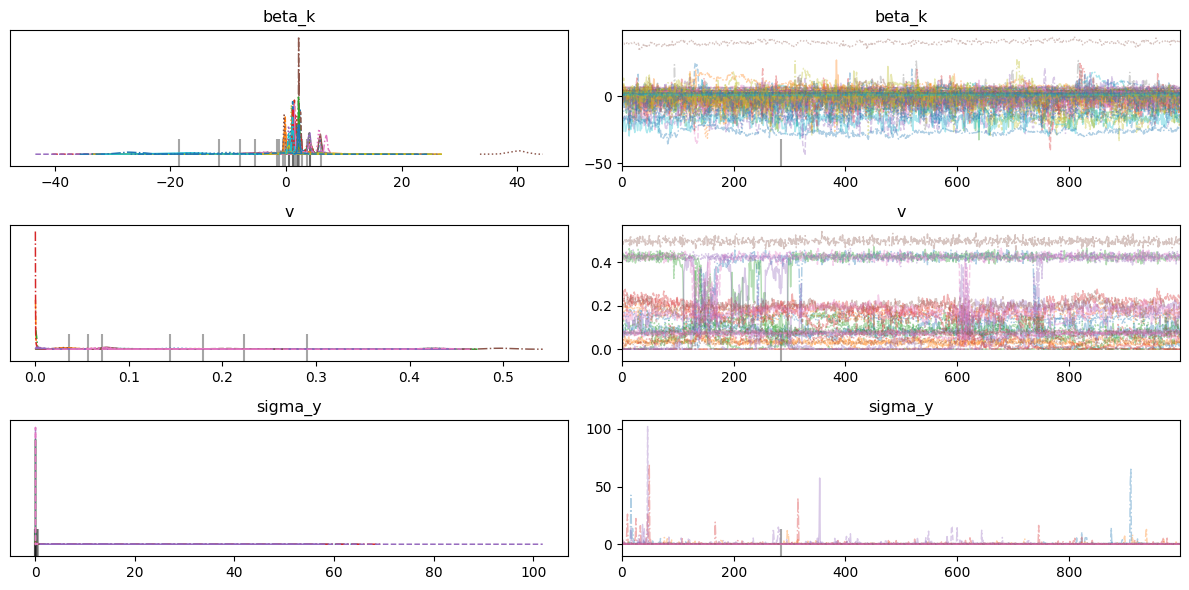

In [ ]:
az.plot_trace(result, var_names=["beta_k", "v", "sigma_y"])
plt.tight_layout()

<ipython-input-44-dd35d8865d2b>:2: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  pm.sample_posterior_predictive(result, extend_inferencedata=True)
INFO:pymc.sampling.forward:Sampling: [y_obs]


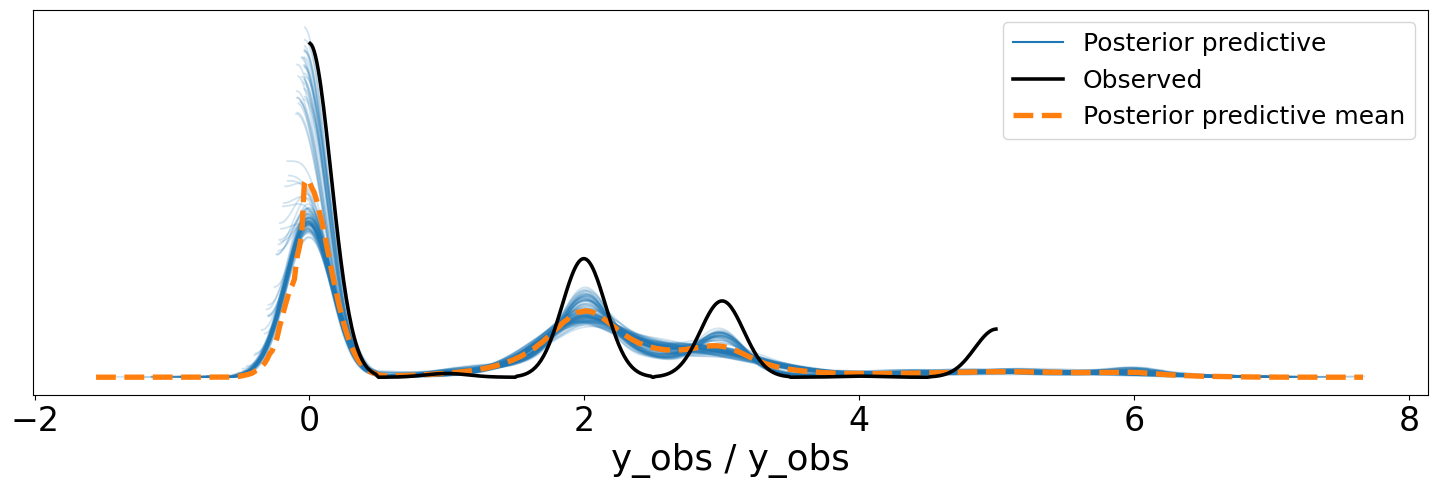

In [ ]:
with MixtureModel:
    pm.sample_posterior_predictive(result, extend_inferencedata=True)

fig = az.plot_ppc(result, num_pp_samples=100, figsize=(18,5))


<Axes: >

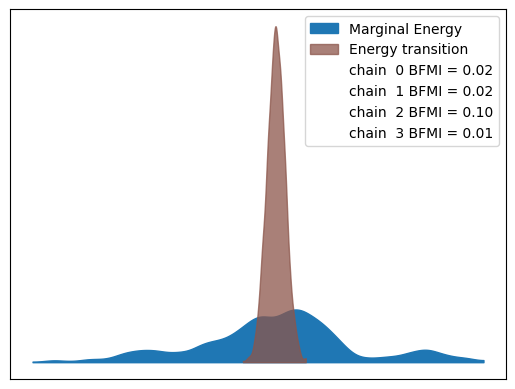

In [ ]:
az.plot_energy(result)

In [ ]:
az.summary(result, round_to=4)

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"beta_k[0, 0]",1.5672,4.6508,-8.8299,7.4619,1.8060,1.3379,5.6340,27.6670,2.1383
"beta_k[0, 1]",1.5166,3.5165,-1.6304,11.5031,1.0022,0.8235,10.5234,24.9241,1.9149
"beta_k[0, 2]",-1.1208,4.8821,-12.3322,5.6568,2.0088,1.4971,6.0562,22.6362,2.1346
"beta_k[0, 3]",1.6671,2.5562,-2.2202,7.6870,0.1694,0.2497,16.6659,19.7833,1.7324
"beta_k[0, 4]",-1.4359,5.5158,-12.4489,7.0042,1.7328,1.2624,9.5368,44.5797,1.3423
...,...,...,...,...,...,...,...,...,...
"mu[1459, 2]",1.8484,1.6201,-0.0100,3.7795,0.7003,0.5250,5.8492,5.2074,2.0295
"mu[1459, 3]",2.8649,1.3131,-0.0100,4.0900,0.3182,0.2289,12.9160,17.4309,1.5196
"mu[1459, 4]",1.1363,1.7443,-0.0100,4.7587,0.5117,0.3714,10.5042,10.0102,1.3050
"mu[1459, 5]",2.3324,1.1466,-0.0100,3.4701,0.5276,0.4064,4.8173,11.8421,2.5251


In [ ]:
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(result).items()})

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


HMC Split-Rhats {'beta_k': array([[2.1383, 1.9149, 2.1346, 1.7324, 1.3423, 2.8805, 3.0694],
       [1.9022, 1.6162, 1.5346, 1.8915, 1.1995, 1.8207, 1.9737],
       [1.9396, 1.8698, 1.6461, 1.6144, 1.1666, 1.9152, 2.2011]]), 'beta_hum': array([1.7059, 1.3495, 1.3539]), 'hum': array([1.2072, 1.1918, 1.202 , ..., 1.1917, 1.5227, 1.5048]), 'chol': array([1.3753, 1.1586, 1.6429, 1.0644, 1.0981, 1.2834, 1.0266, 1.0457,
       1.0476, 1.0786, 1.0686, 1.0337, 1.0379, 1.0336, 1.1265, 1.1634,
       1.1163, 1.1346, 1.138 , 1.1353, 1.5594, 1.1452, 1.1769, 1.1972,
       1.1518, 1.1535, 1.1747, 1.6349]), 'chol_hum': array([1.031 , 1.0053, 1.0007, 1.028 , 1.0206, 1.02  ]), 'sigma_hum': 2.16, 'alpha': array([1.0719, 1.4608, 1.4163, 1.4813, 1.369 , 1.2386, 1.2844]), 'v': array([1.8861, 2.4023, 1.8422, 2.0895, 1.7199, 2.8541, 2.1755]), 'sigma_y': array([1.525 , 1.1265, 1.8907, 1.2975, 1.2828, 2.8861, 2.4875]), 'chol_corr': array([[   nan, 1.0564, 1.0852, 1.0364, 1.0691, 1.0991, 1.0758],
       [1.0564

In [ ]:
with MixtureModel:
    pm.compute_log_likelihood(result)

In [ ]:
az.waic(result, var_name="y_obs")

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 4000 posterior samples and 1460 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   329.56    76.54
p_waic     1239.46        -

There has been a warning during the calculation. Please check the results.

In [ ]:
az.loo(result, var_name="y_obs")

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1037: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 posterior samples and 1460 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   367.28    74.81
p_loo     1201.73        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     1088   74.5%
 (0.5, 0.7]   (ok)        161   11.0%
   (0.7, 1]   (bad)       198   13.6%
   (1, Inf)   (very bad)   13    0.9%